# import list 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안 보이게
# warnings.filterwarnings(action='default') # 경고 메세지 보이게

# 데이터 로드

In [19]:
# 파일 경로
food_nutrition_path = "food_nutrition_data.csv"
generated_meal_plan_path = "generated_meal_plan.csv"

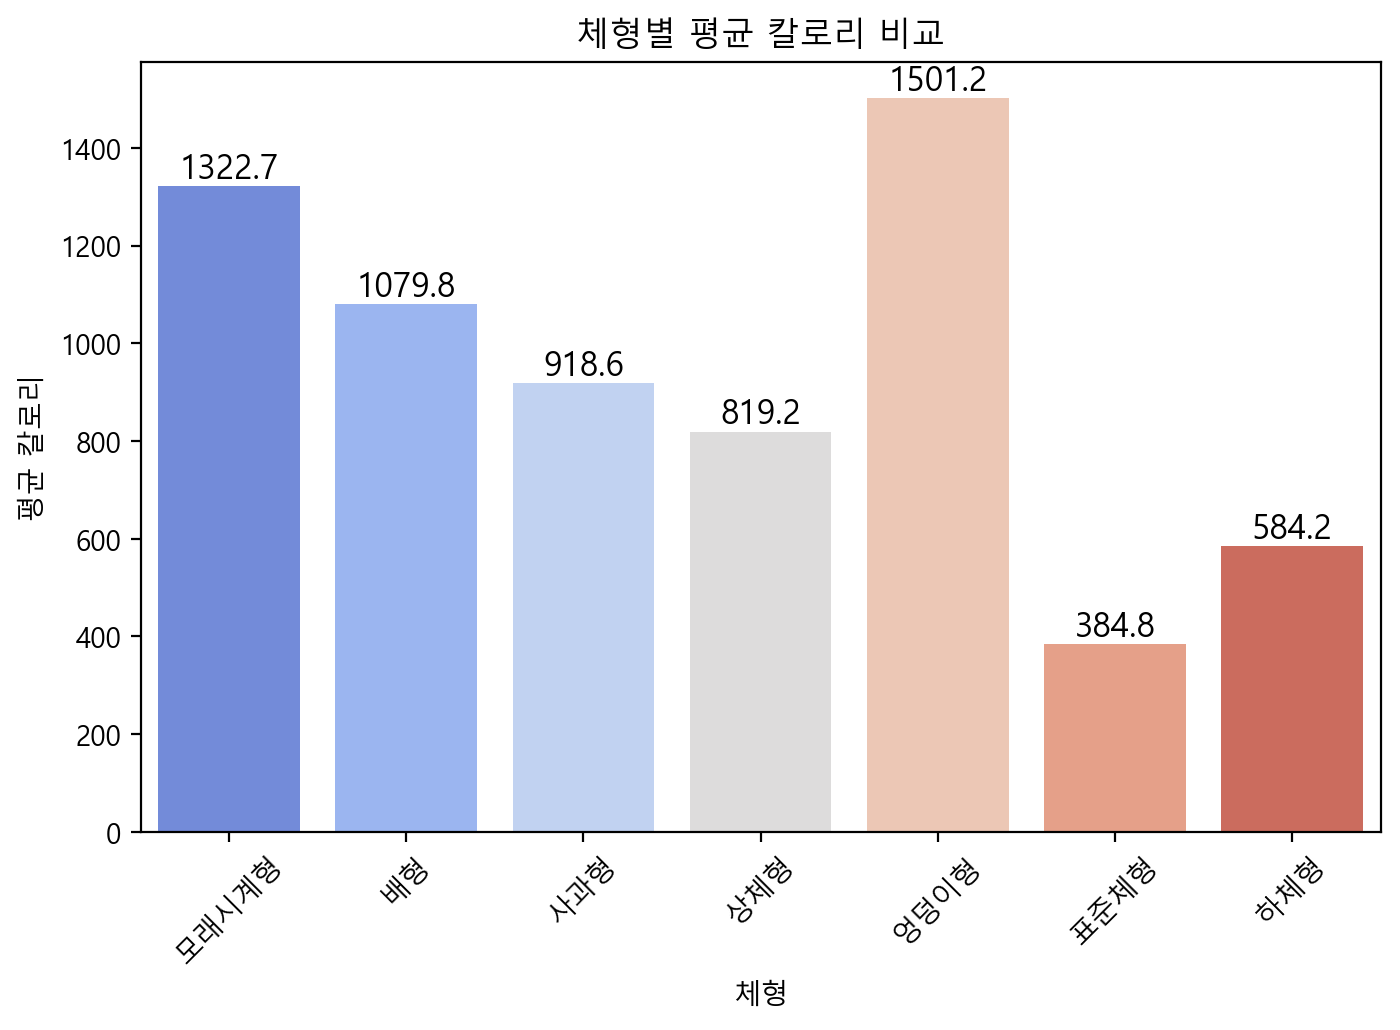

In [24]:
# 데이터 불러오기
food_nutrition_df = pd.read_csv(food_nutrition_path)
generated_meal_plan_df = pd.read_csv(generated_meal_plan_path)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=avg_calories_per_body_type.index, y=avg_calories_per_body_type.values, palette="coolwarm")

# 막대 위에 값 표시
for bar in ax.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=12)

plt.xlabel("체형")
plt.ylabel("평균 칼로리")
plt.title("체형별 평균 칼로리 비교")
plt.xticks(rotation=45)
plt.show()

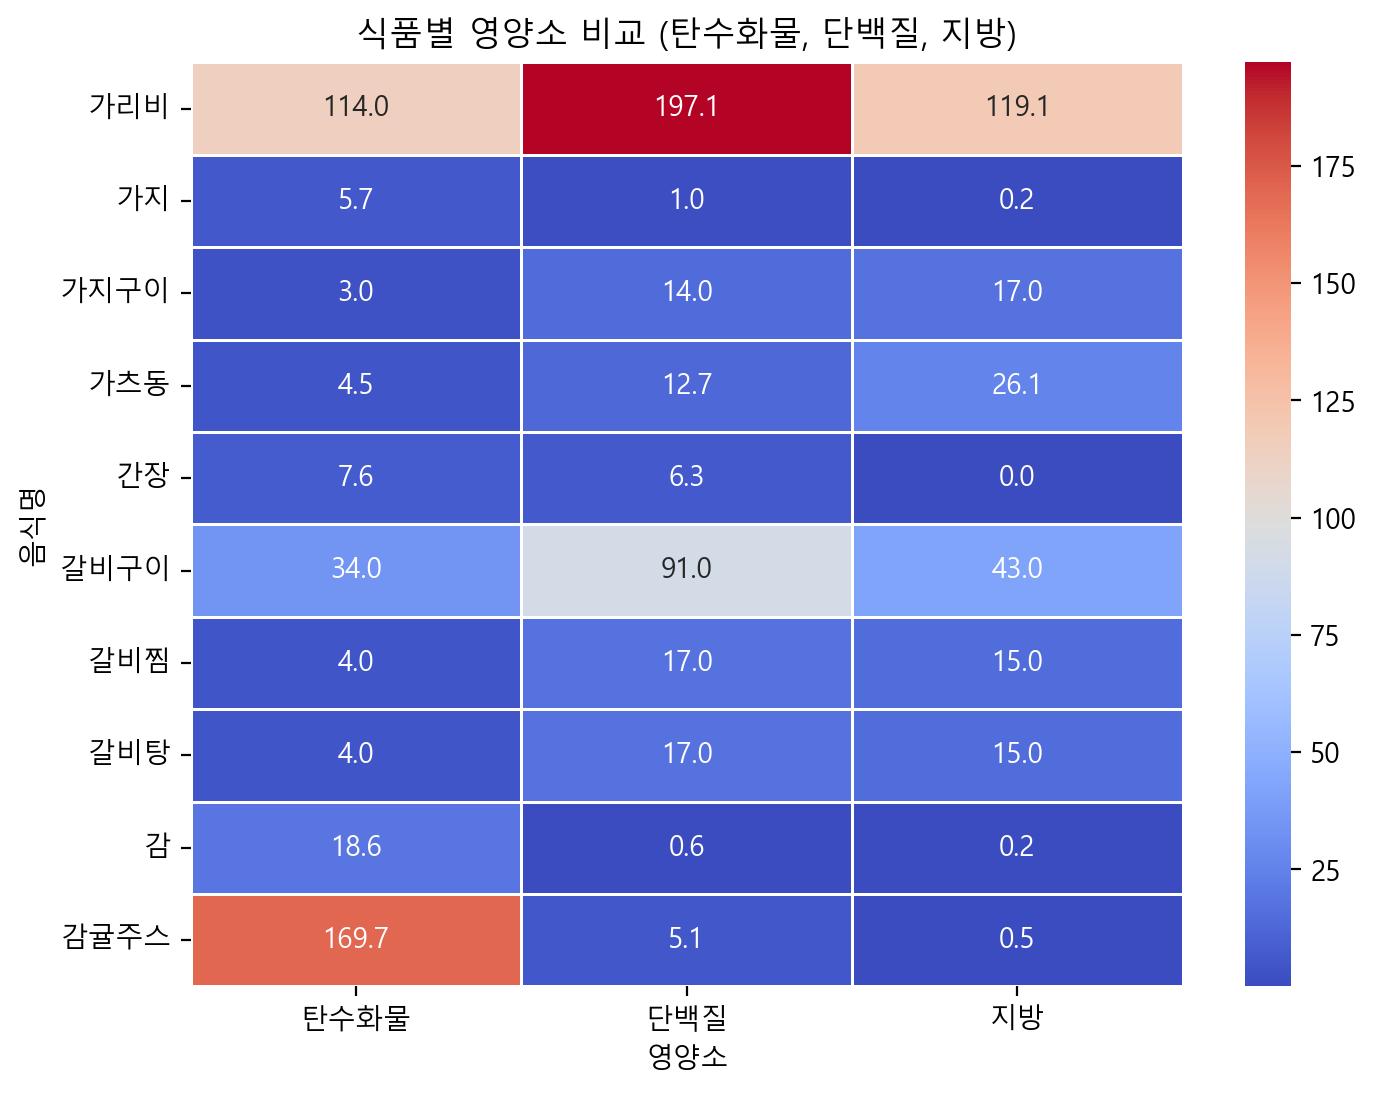

In [22]:
# 상위 10개 식품의 탄단지 데이터 추출
top_foods = food_nutrition_df.head(10).set_index("식품명(한글)")[["탄수화물", "단백질", "지방"]]

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(top_foods, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".1f")
plt.title("식품별 영양소 비교 (탄수화물, 단백질, 지방)")
plt.xlabel("영양소")
plt.ylabel("음식명")
plt.show()

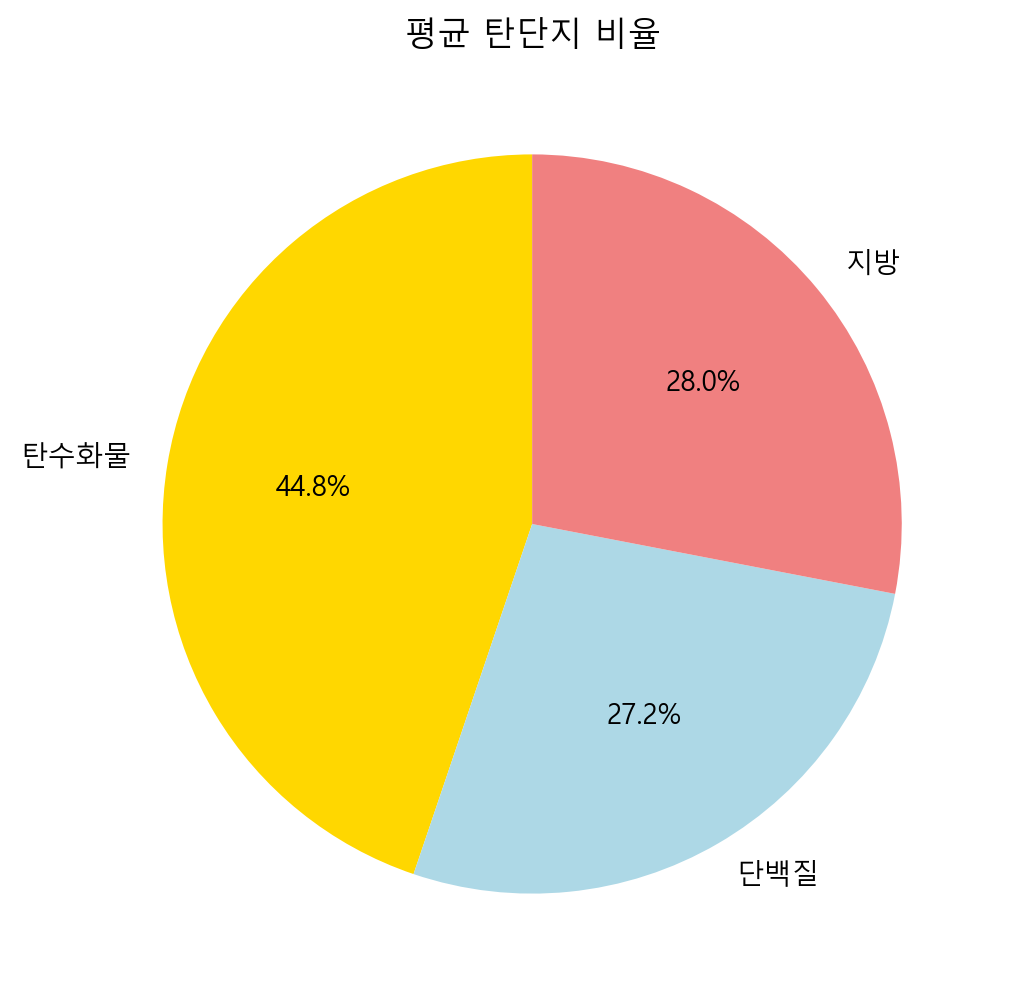

In [25]:
# 탄단지 비율 평균값 계산
macro_nutrients = generated_meal_plan_df[["탄수화물", "단백질", "지방"]].mean()

# 파이 차트 생성
plt.figure(figsize=(6, 6))
plt.pie(macro_nutrients, labels=["탄수화물", "단백질", "지방"], autopct="%1.1f%%", colors=["gold", "lightblue", "lightcoral"], startangle=90)
plt.title("평균 탄단지 비율")
plt.show()

<Figure size 1000x600 with 0 Axes>

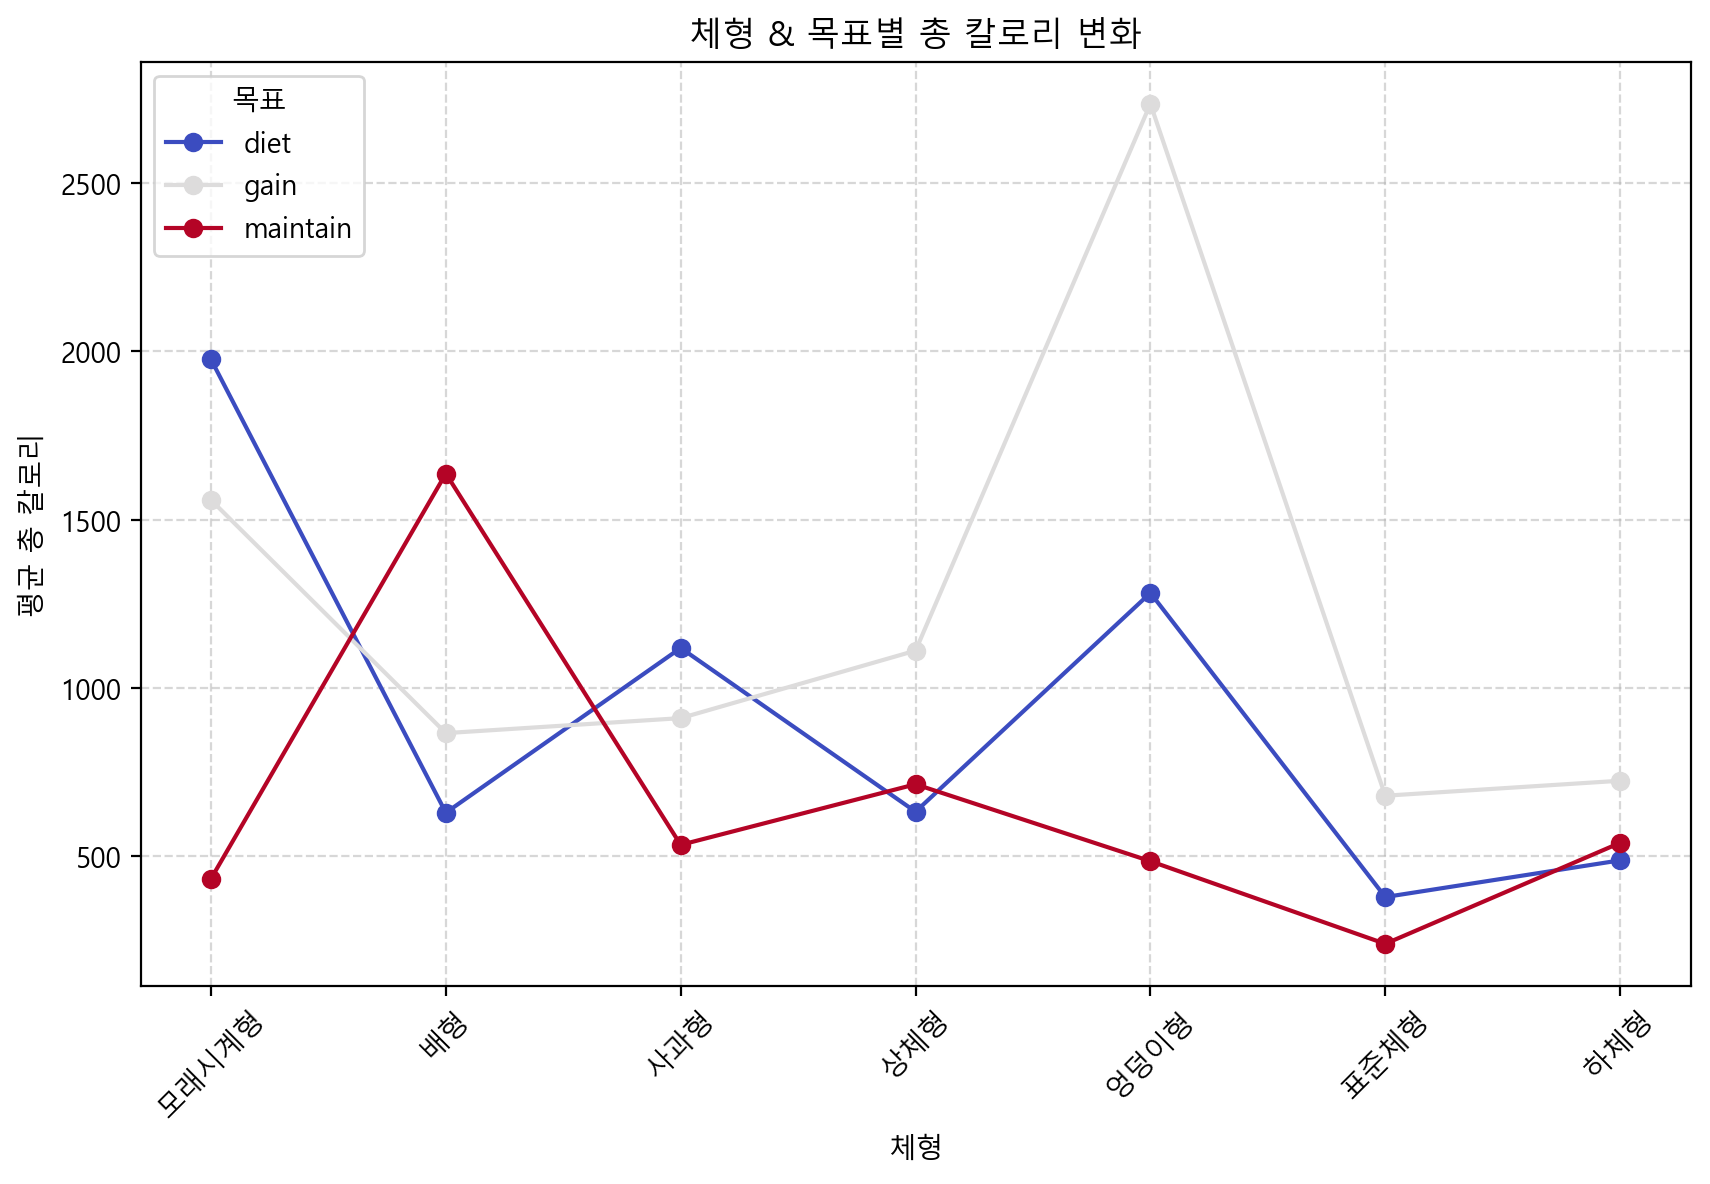

In [26]:
plt.figure(figsize=(10, 6))

# 체형 & 목표별 평균 칼로리 계산
calories_by_body_goal = generated_meal_plan_df.groupby(["체형", "목표"])["총 칼로리"].mean().unstack()

# 라인 차트
calories_by_body_goal.plot(kind="line", marker="o", figsize=(10, 6), colormap="coolwarm")

plt.xlabel("체형")
plt.ylabel("평균 총 칼로리")
plt.title("체형 & 목표별 총 칼로리 변화")
plt.legend(title="목표", loc="upper left")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

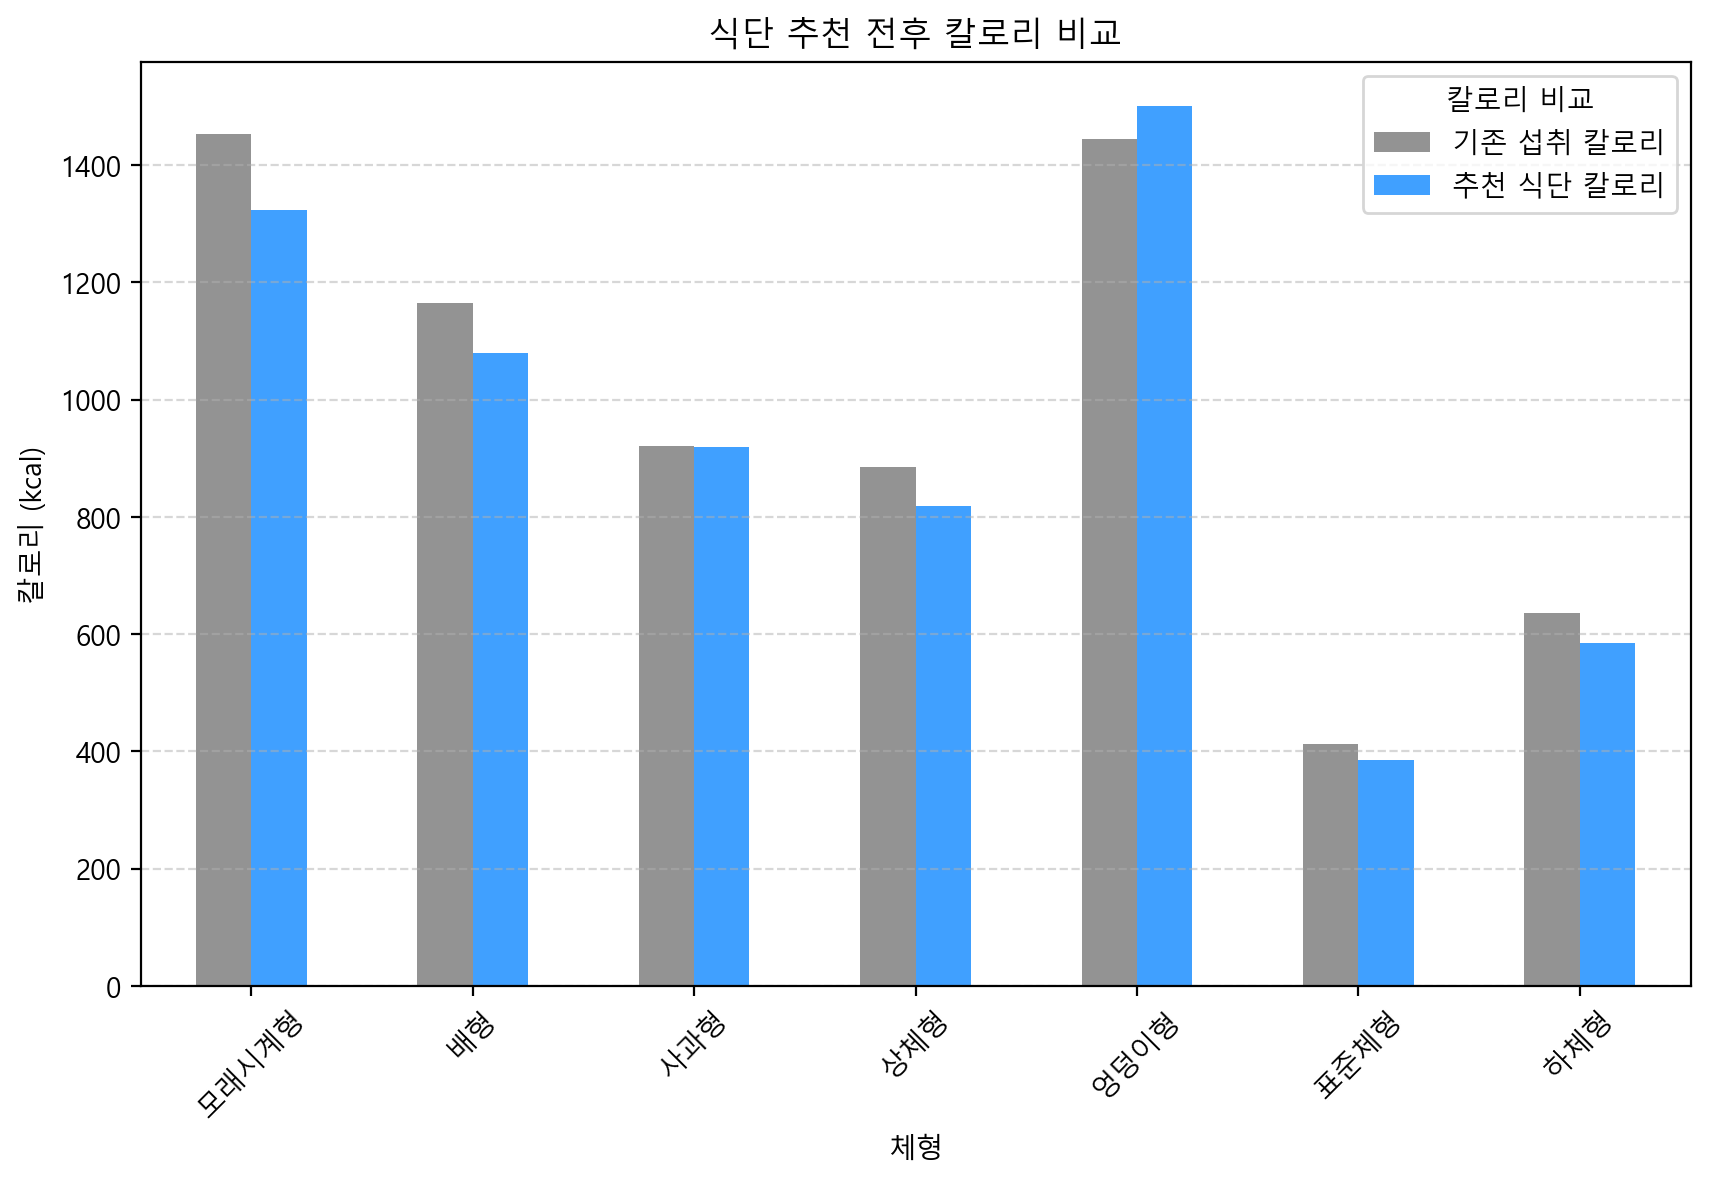

In [31]:
# 가상의 기존 섭취 칼로리 (예: 평균보다 10% 높거나 낮게 설정)
existing_calories = avg_calories_per_body_type * np.random.uniform(0.9, 1.1, size=len(avg_calories_per_body_type))

# 데이터프레임으로 변환
calorie_comparison_df = pd.DataFrame({
    "체형": avg_calories_per_body_type.index,
    "기존 섭취 칼로리": existing_calories.values,
    "추천 식단 칼로리": avg_calories_per_body_type.values
}).set_index("체형")

# 막대 그래프 생성
calorie_comparison_df.plot(kind="bar", figsize=(10, 6), color=["gray", "dodgerblue"], alpha=0.85)
plt.xlabel("체형")
plt.ylabel("칼로리 (kcal)")
plt.title("식단 추천 전후 칼로리 비교")
plt.xticks(rotation=45)
plt.legend(title="칼로리 비교")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

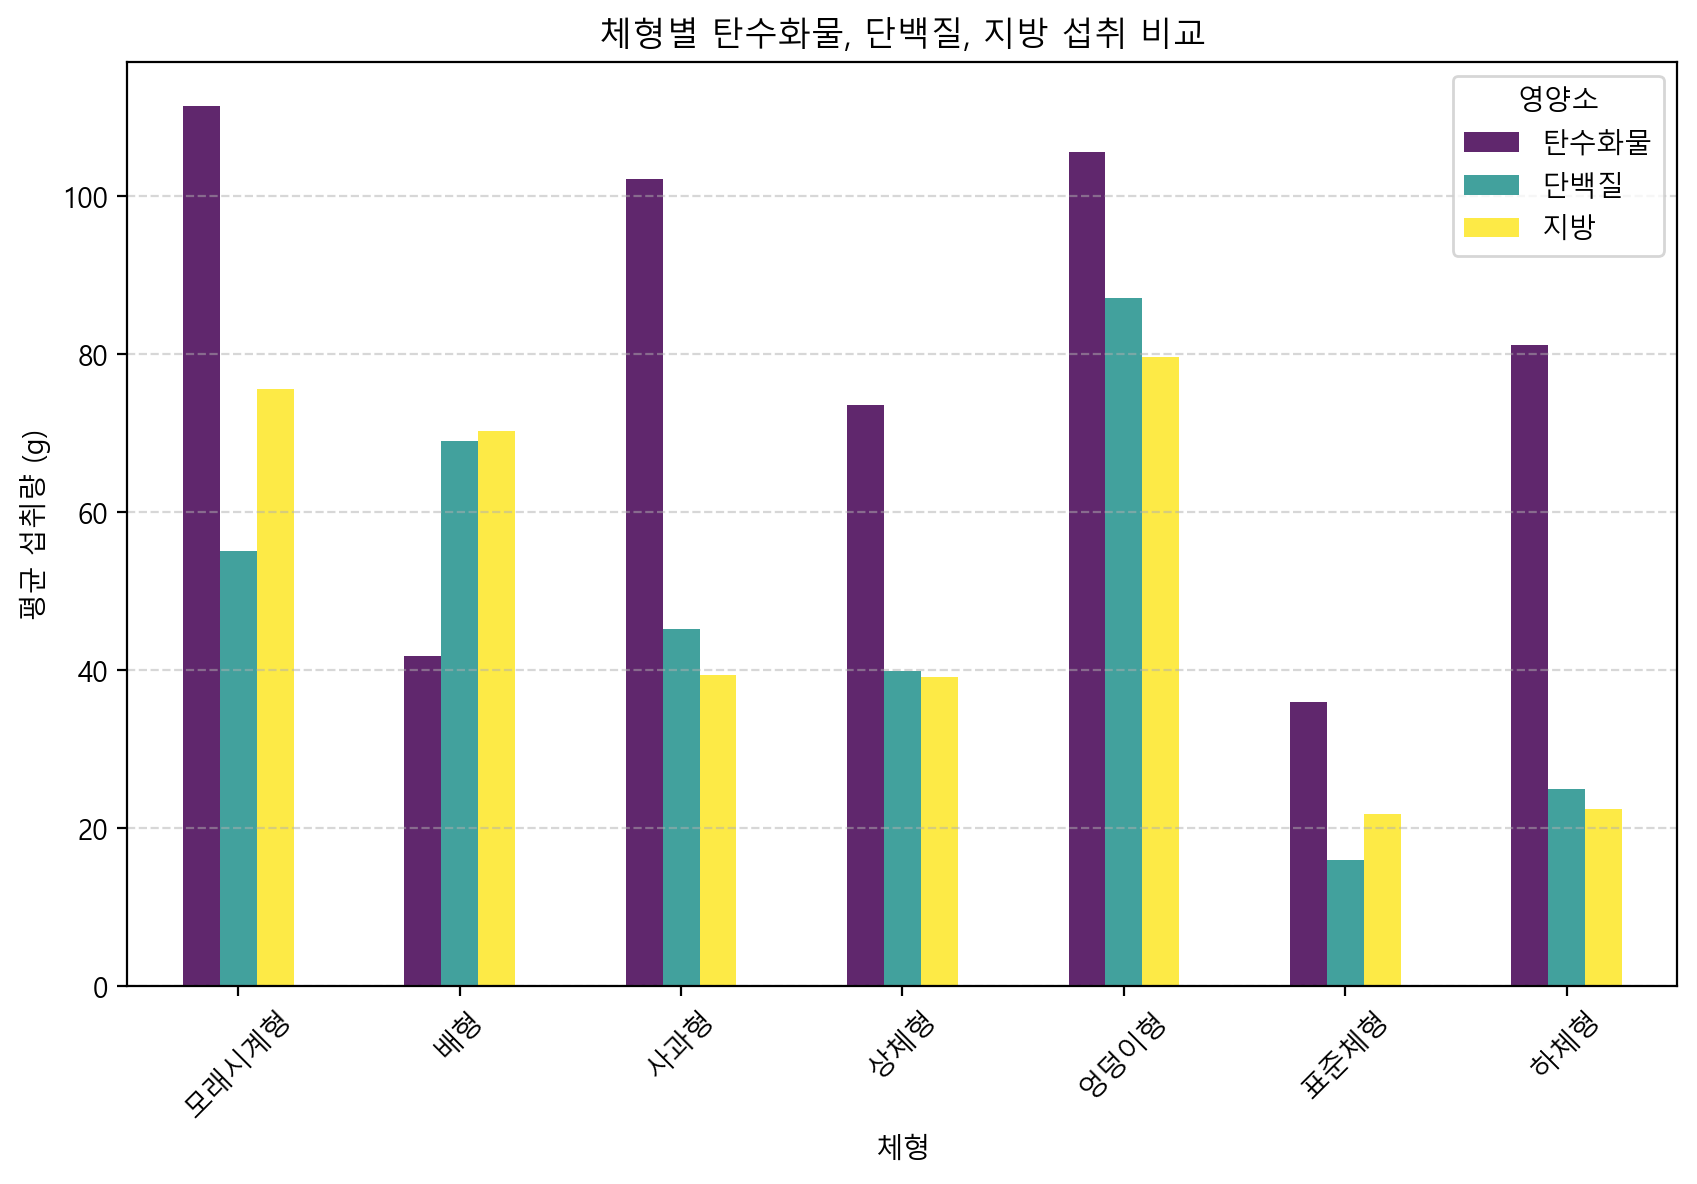

In [32]:
# 체형별 탄단지 비율
macro_nutrients_by_body = generated_meal_plan_df.groupby("체형")[["탄수화물", "단백질", "지방"]].mean()

macro_nutrients_by_body.plot(kind="bar", figsize=(10, 6), colormap="viridis", alpha=0.85)
plt.xlabel("체형")
plt.ylabel("평균 섭취량 (g)")
plt.title("체형별 탄수화물, 단백질, 지방 섭취 비교")
plt.xticks(rotation=45)
plt.legend(title="영양소")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

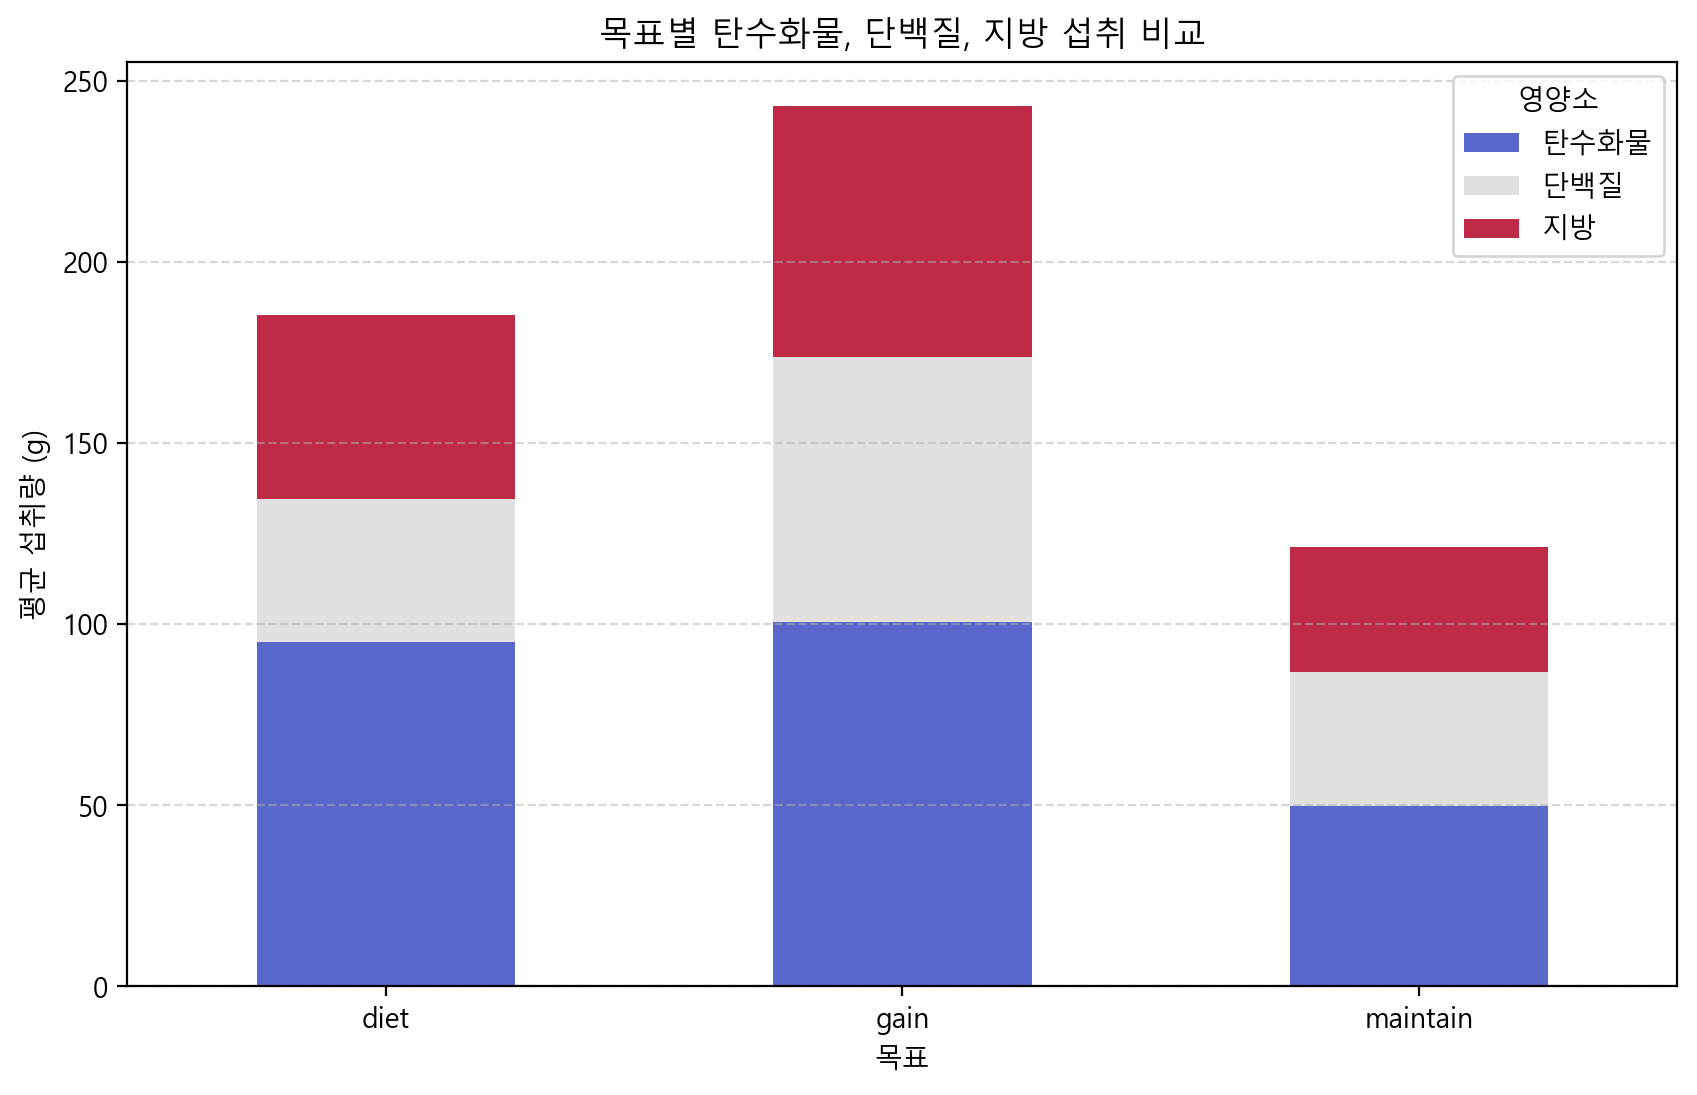

In [33]:
# 목표별 탄단지 비율
macro_nutrients_by_goal = generated_meal_plan_df.groupby("목표")[["탄수화물", "단백질", "지방"]].mean()

macro_nutrients_by_goal.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm", alpha=0.85)
plt.xlabel("목표")
plt.ylabel("평균 섭취량 (g)")
plt.title("목표별 탄수화물, 단백질, 지방 섭취 비교")
plt.xticks(rotation=0)
plt.legend(title="영양소")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


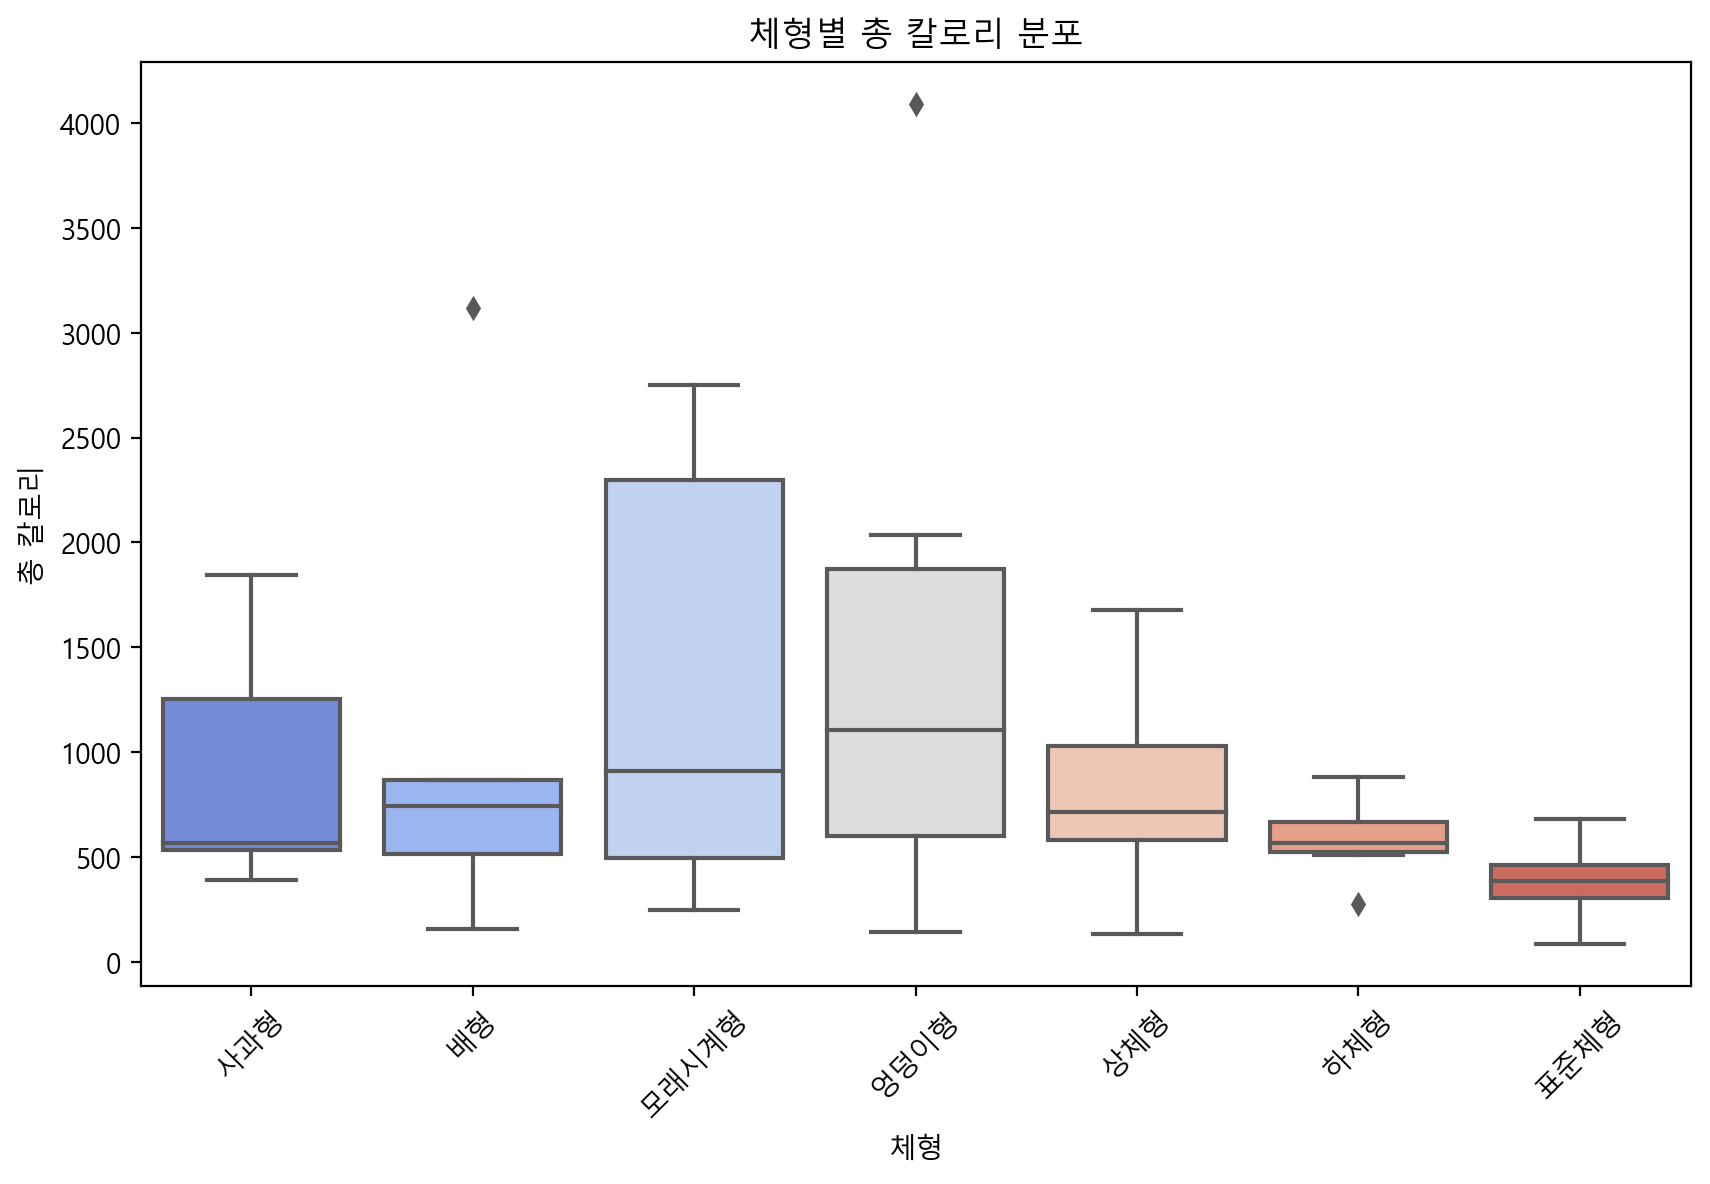

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="체형", y="총 칼로리", data=generated_meal_plan_df, palette="coolwarm")
plt.xlabel("체형")
plt.ylabel("총 칼로리")
plt.title("체형별 총 칼로리 분포")
plt.xticks(rotation=45)
plt.show()

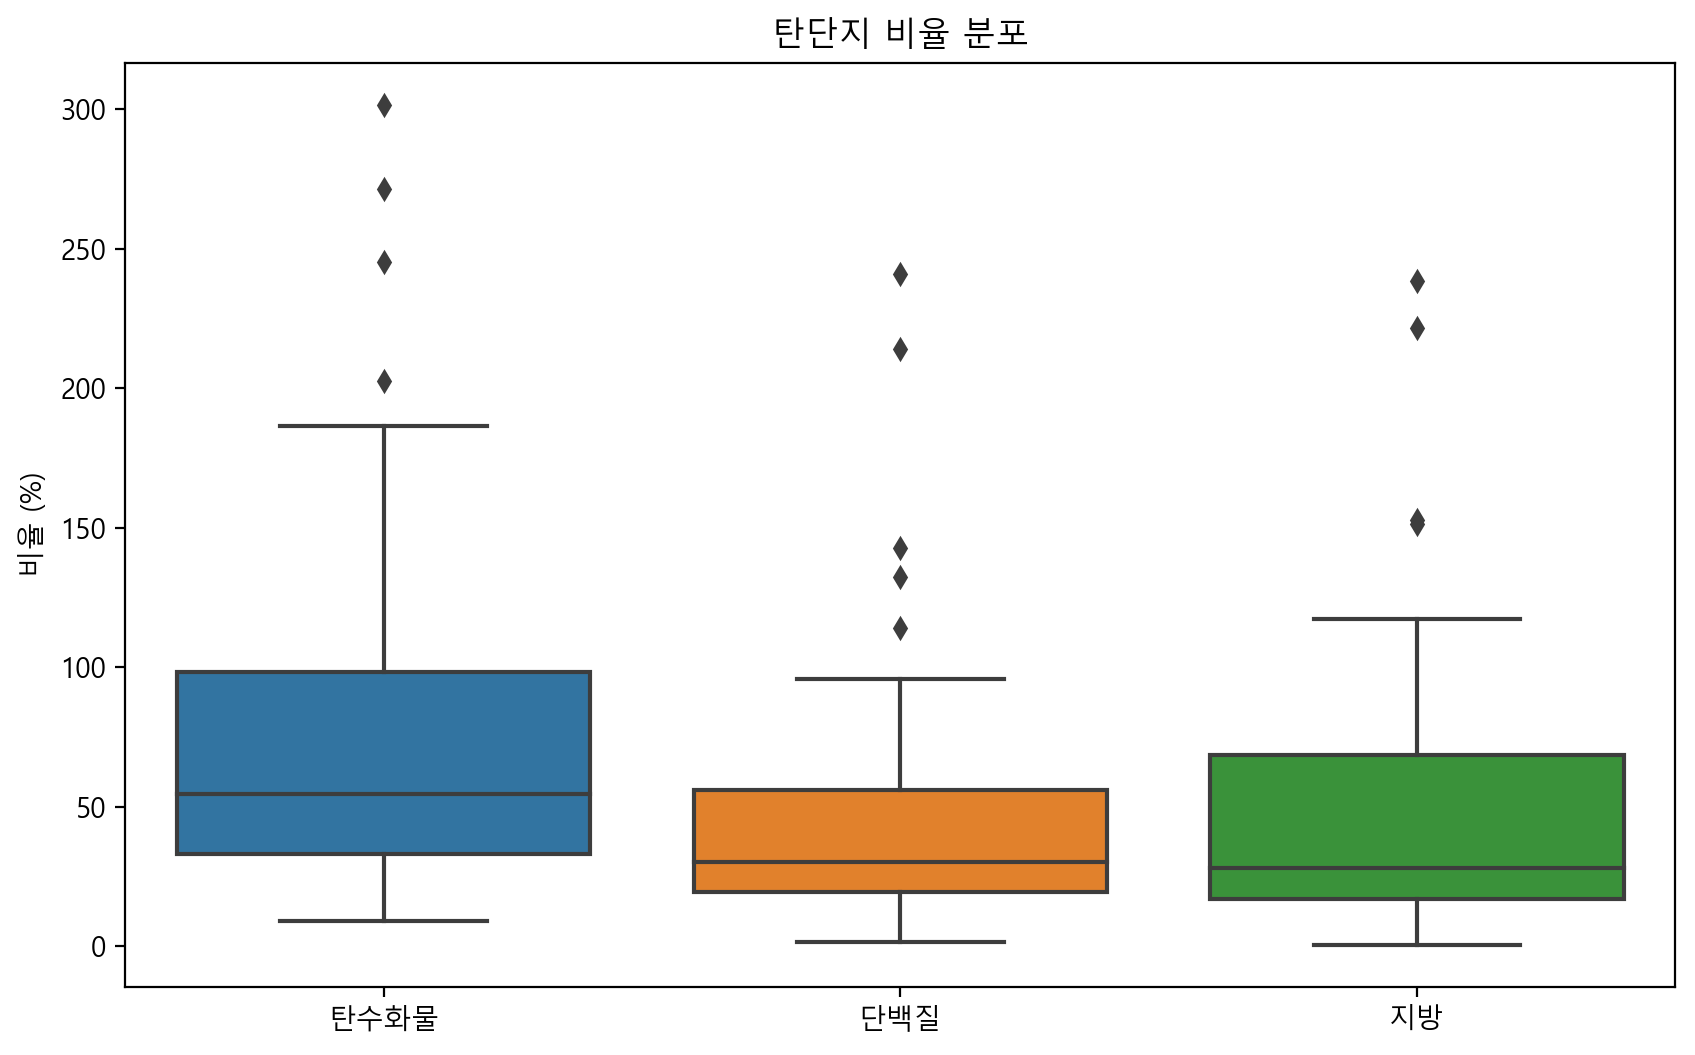

In [38]:
plt.figure(figsize=(10, 6))

# 각 영양소별 박스플롯
sns.boxplot(data=generated_meal_plan_df[["탄수화물", "단백질", "지방"]])
plt.ylabel("비율 (%)")
plt.title("탄단지 비율 분포")
plt.xticks([0, 1, 2], ["탄수화물", "단백질", "지방"])
plt.show()
